# NBA FEATURES SELECTION FOR INVESTMENT DECISION

This analysis is based upon the "nba_dataset.csv". Link below. 

https://github.com/MEMAUDATA/memaudata.github.io/blob/main/datasets/nba_dataset.csv

Two questions here : 

1) Identify the best features for investment decision and develop a ML model
2) Create a web app with the previous model. This app will run locally.

Objective : Enhance recall score !

Dataframe shape : 

- 1340 rows and 21 columns
- Target : "TARGET_5Yrs"
- Name of players : column "Name"
- Features : 19 columns

The question on investment decision is based upon the column "Target_5YRS" which is, here, our dependant variable (supervided ML).
Target_5YRS = 0 => No investment
Target_5YRS = 1 => investment

- Name         : 1 -> type object 
- GP           : 1 -> type int
- Others       : 19 -> type float64
- Nan          : Only 3P% -> 0.008209 %
- Duplicates   : 46 players

Dataframe in depth:

- target column ("TARGET_5Yrs") : 62 % positives / 37% negatives 
- Quantitatives columns : Not normalized and not normally distributed
- GP column : From 10 to 80 , not normally distributed.

Hypothesis : 

-  Target / GP : test difference !
-  Target /  Quantitatives variables : Test differences based upon : MIN / PTS / FGM / FG% / 3P MAde / 3PA / FT% / AST /STL and TOV


NV, Toulouse, octobre,2024

# Install all required librairies from requirements.txt

In [ ]:
pip install -r requirements.txt 

# Import librairies

In [3]:
# For preprocessing
import numpy as np
import pandas as pd
import seaborn as sns
import joblib as jb 
from matplotlib import pyplot as plt
from scipy import stats as stats
import warnings
import nbconvert

In [4]:
# For modelisation
warnings.filterwarnings("ignore") 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif,chi2


# Warnings off

In [5]:
pd.options.mode.chained_assignment = None

# Exploratory Data Analysis

In [6]:
# Load dataset
df1 = pd.read_csv("../datasets/nba_dataset.csv")

Copy the dataset to avoid reloading it

In [7]:
# backup 
df = df1.copy()
df.shape

(1340, 21)

In [8]:
# Display all columns
pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", None)
df.head()


,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [9]:
df.dtypes.value_counts()


float64    19
object      1
int64       1
Name: count, dtype: int64

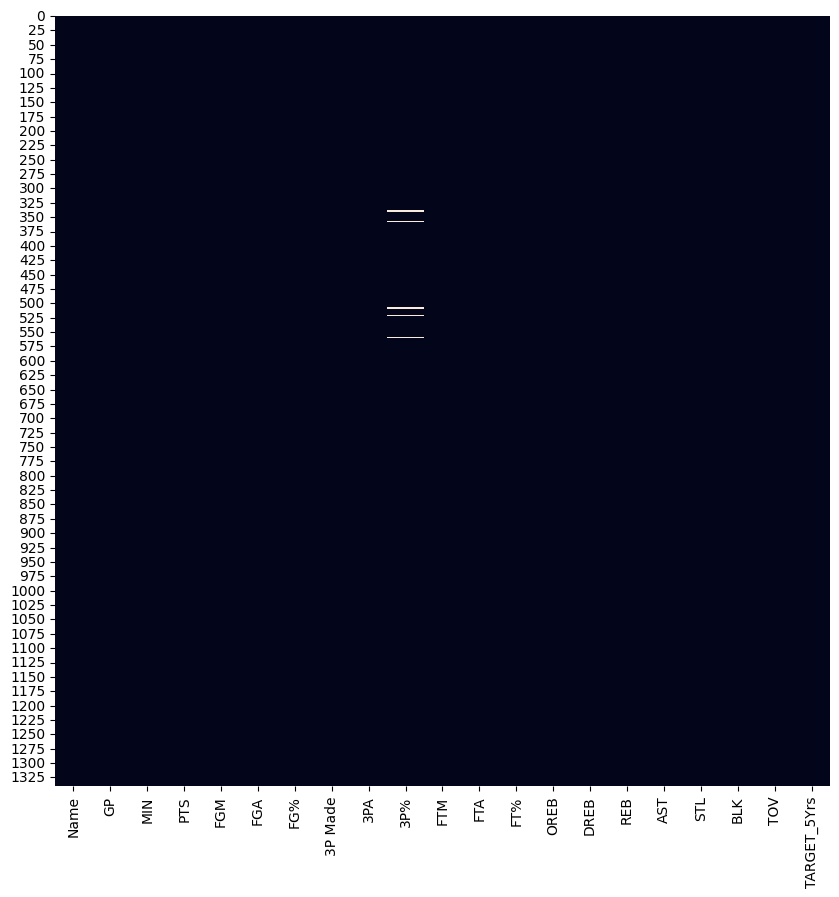

In [10]:
# Plot the entire data with heatmap from seaborn to try to look at valuable column
plt.figure(figsize=(10,10))
sns.heatmap(df.isna(),cbar=False) # 1 = empty
plt.show()

# Nan

In [11]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Name           0.000000
BLK            0.000000
STL            0.000000
AST            0.000000
REB            0.000000
DREB           0.000000
OREB           0.000000
FT%            0.000000
FTA            0.000000
TOV            0.000000
FTM            0.000000
3PA            0.000000
3P Made        0.000000
FG%            0.000000
FGA            0.000000
FGM            0.000000
PTS            0.000000
MIN            0.000000
GP             0.000000
TARGET_5Yrs    0.000000
3P%            0.008209
dtype: float64

# Duplicated players ?

In [45]:
df_without_duplicates = df.drop_duplicates(subset='Name')
print(f"Nb of duplicated players : {df.shape[0] - df_without_duplicates.shape[0]}")

Nb of duplicated players : 46


# Target column

In [24]:
df['TARGET_5Yrs'].value_counts(normalize=True)

TARGET_5Yrs
1.0    0.620149
0.0    0.379851
Name: proportion, dtype: float64

# Quantitatives columns

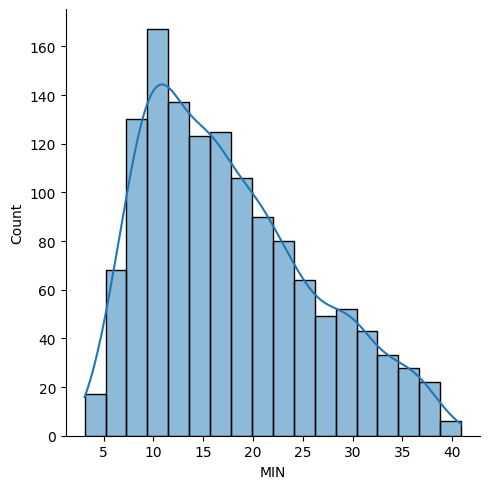

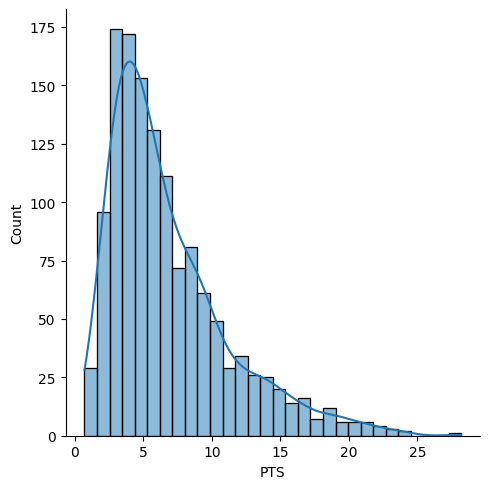

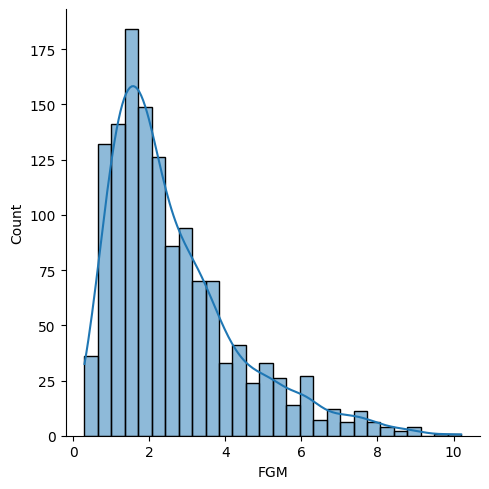

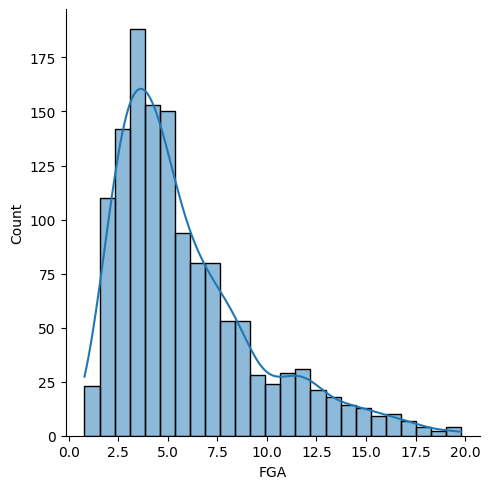

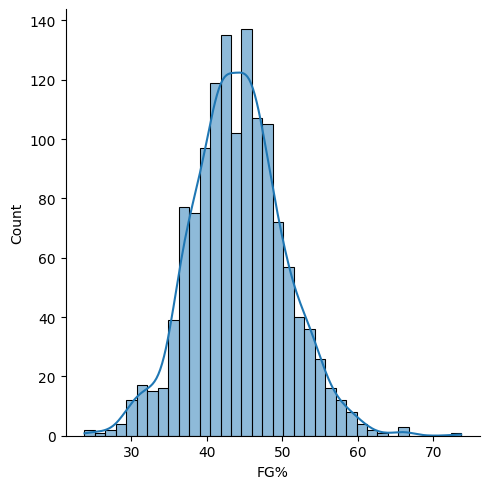

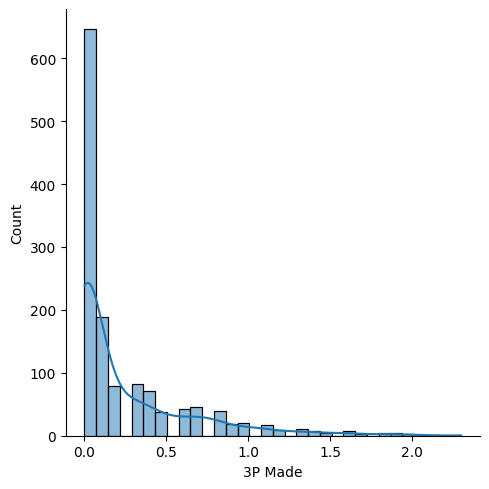

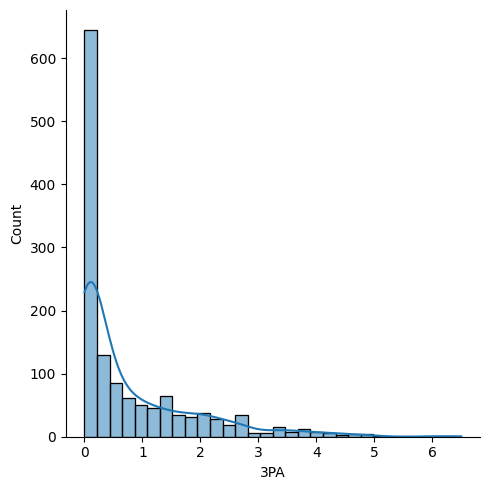

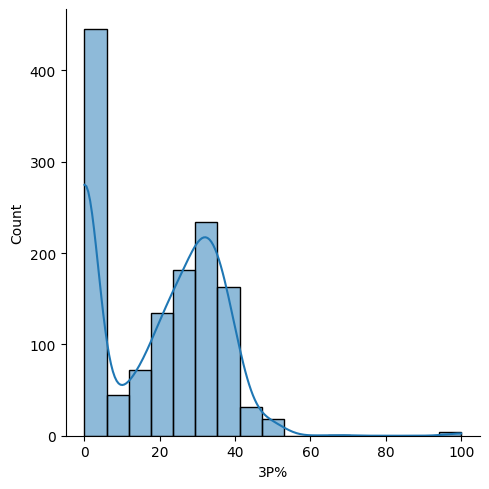

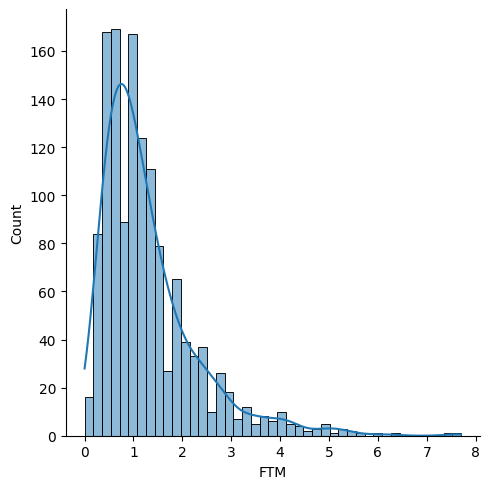

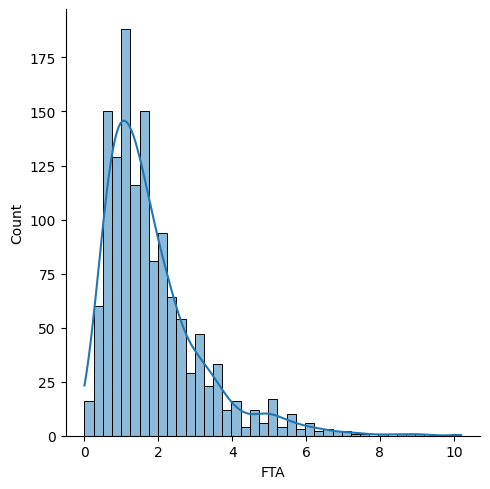

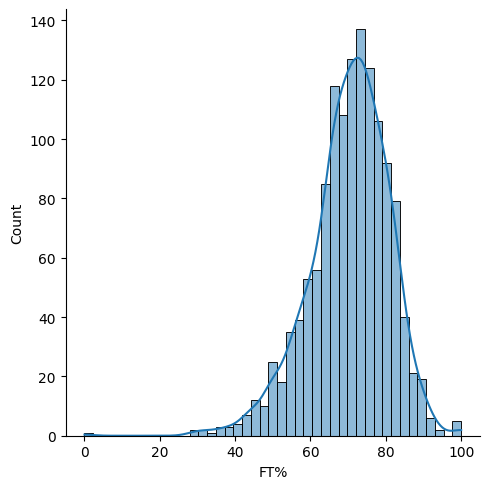

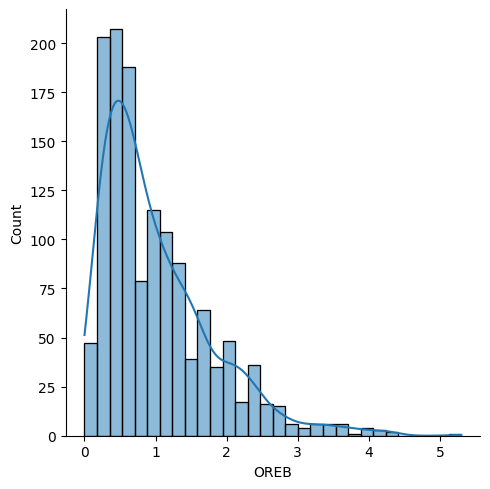

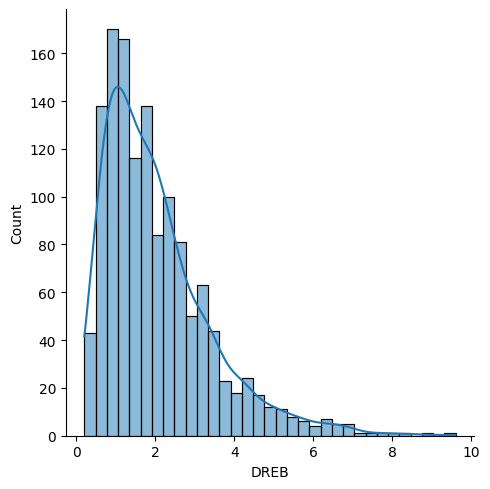

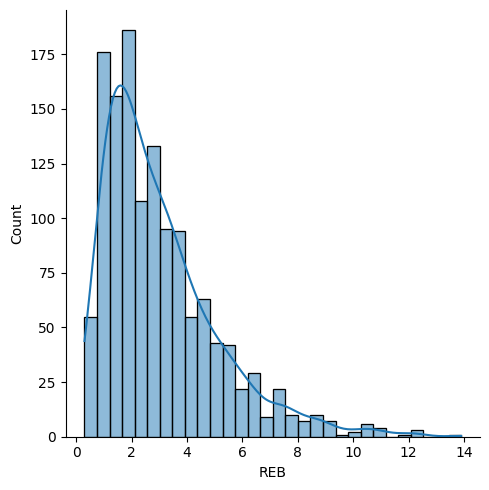

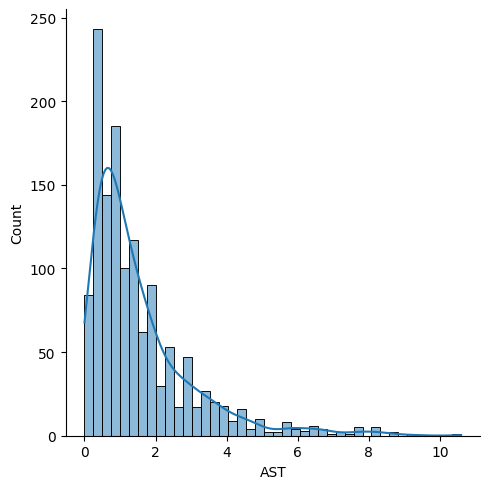

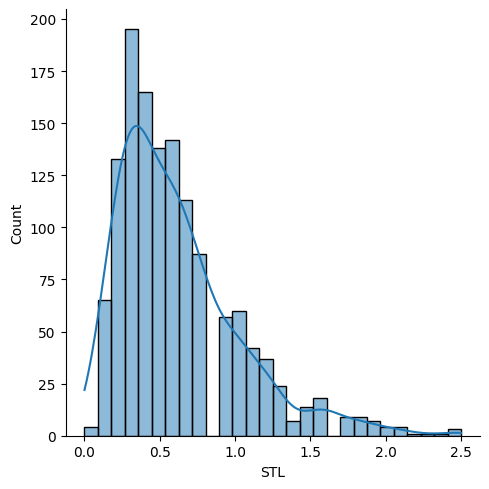

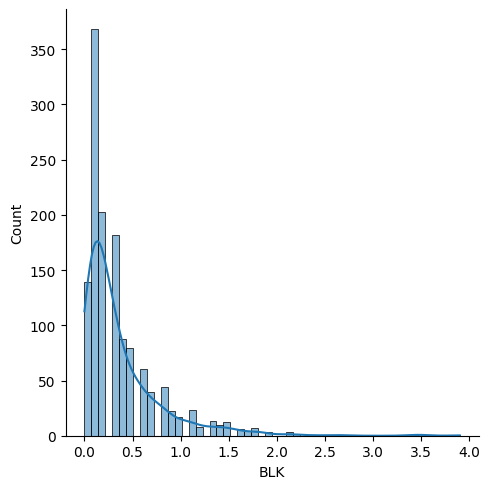

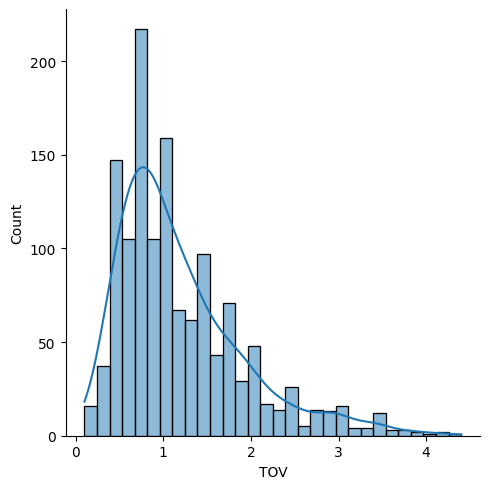

In [38]:
for col in df.select_dtypes('float'):
    if col != 'TARGET_5Yrs':
        sns.displot(df[col], kde = 'True')

# GP column

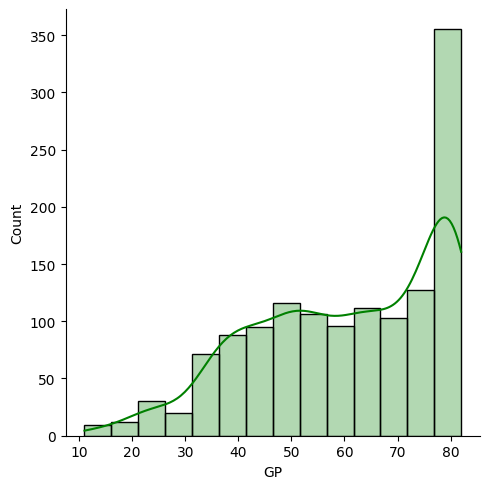

In [37]:
sns.displot(df['GP'],kde=True,color='green',alpha=0.3)

# Realtionship between GP and target

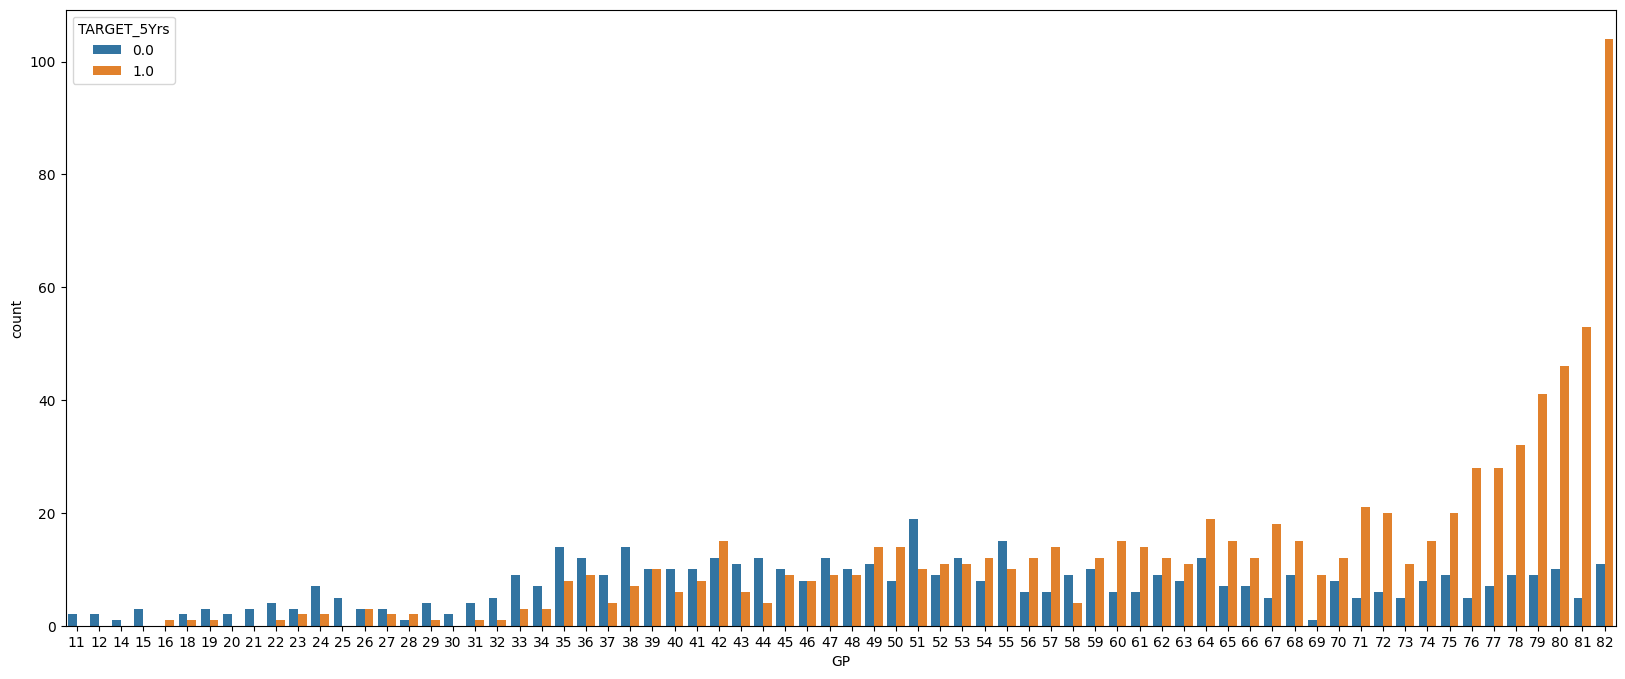

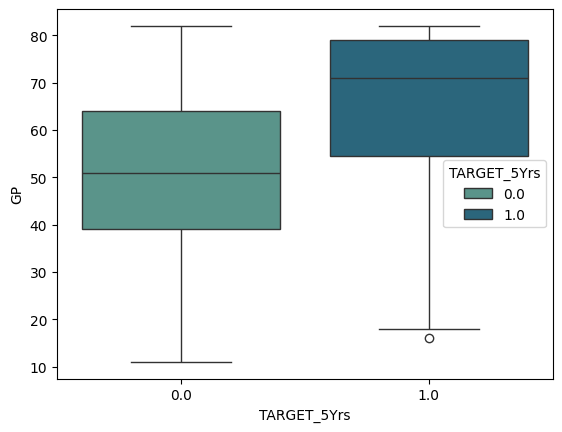

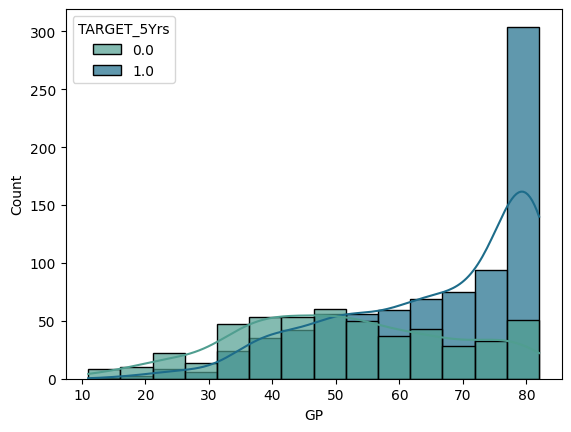

In [66]:
plt.figure(figsize=(20,8))
sns.countplot(x='GP',hue='TARGET_5Yrs',data=df)
plt.show()

plt.figure()
sns.boxplot(x='TARGET_5Yrs', y='GP', data=df,hue='TARGET_5Yrs',palette="crest")
plt.show()

plt.figure()
sns.histplot(data=df, x=df['GP'], hue='TARGET_5Yrs', kde=True, palette="crest", alpha=0.7, common_norm=False)
plt.show()

# Relationship between target and variables

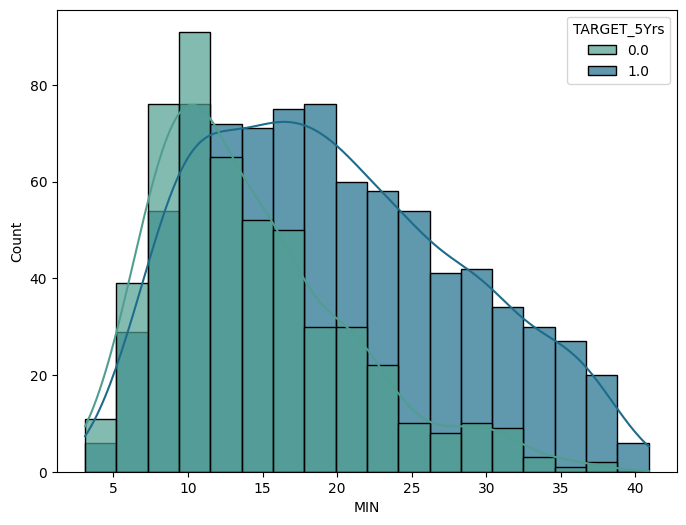

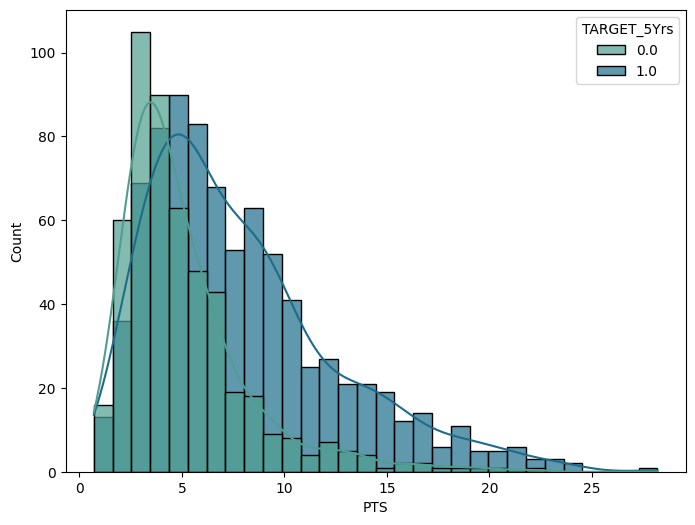

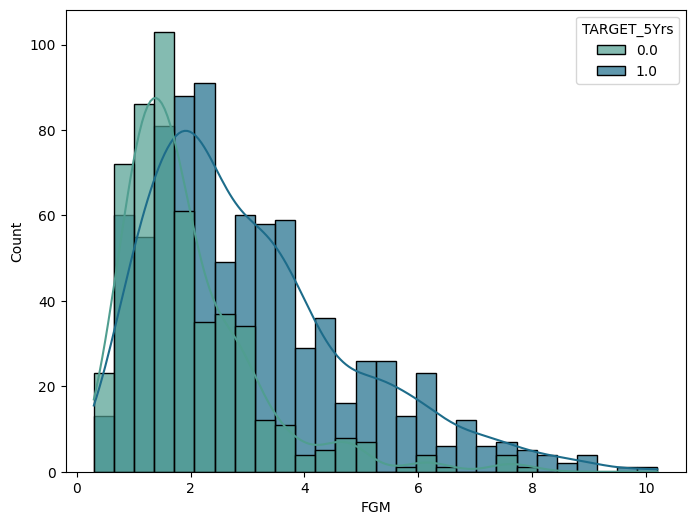

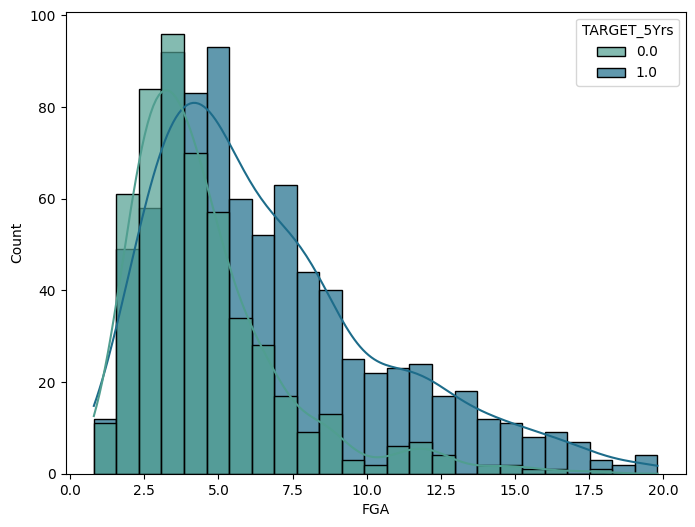

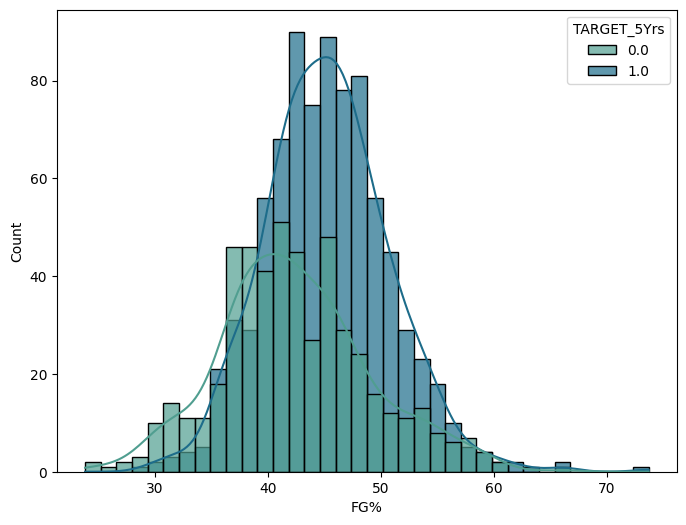

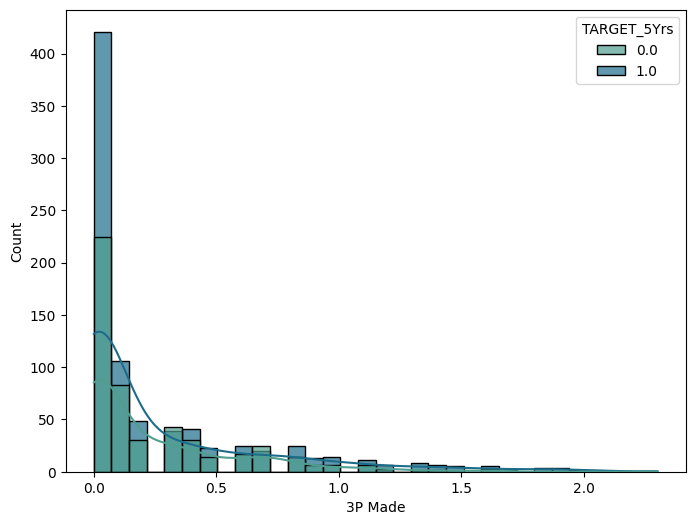

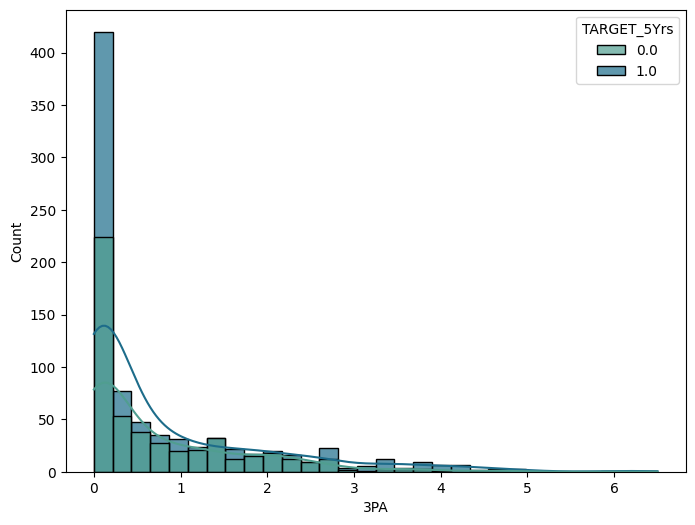

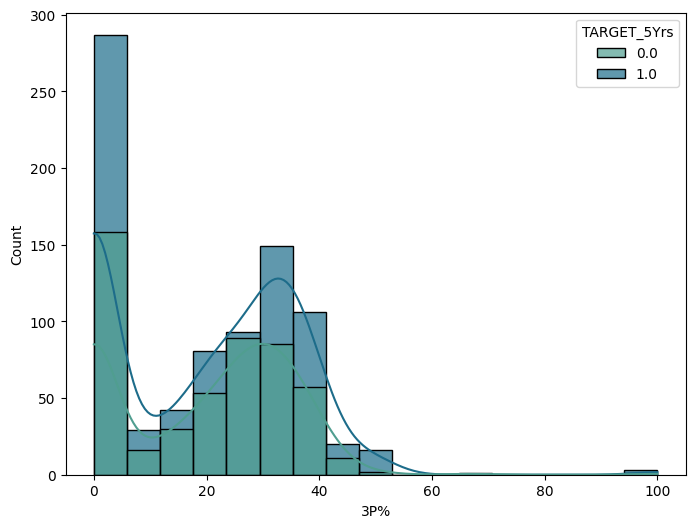

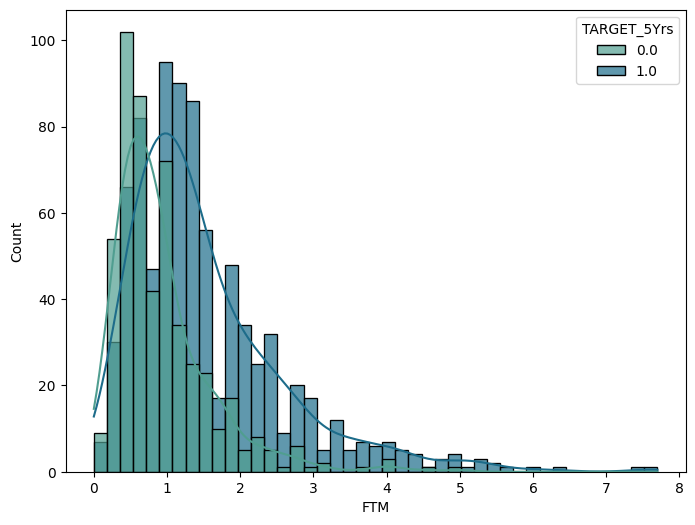

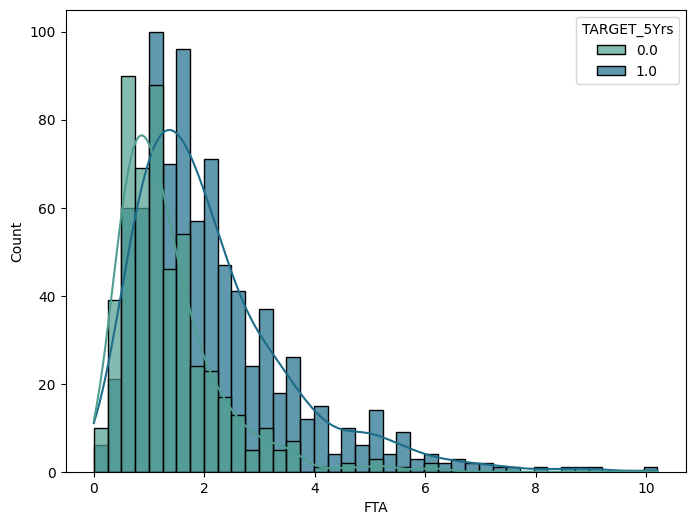

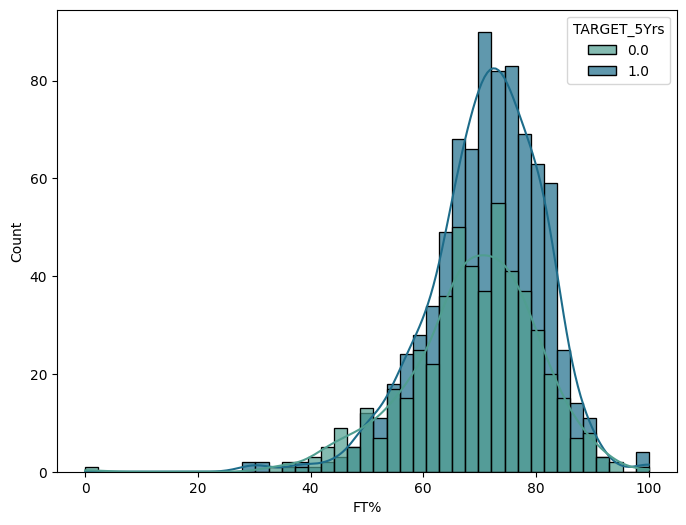

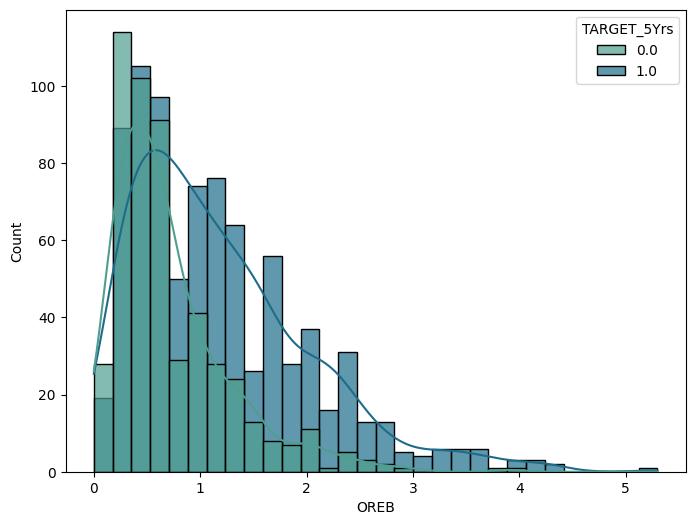

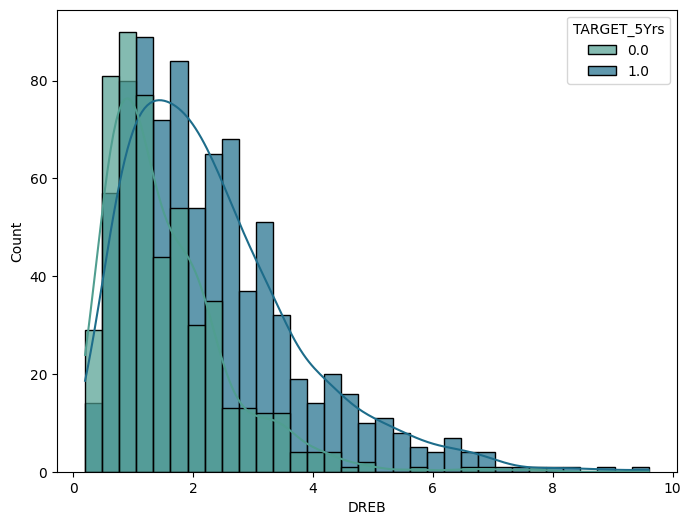

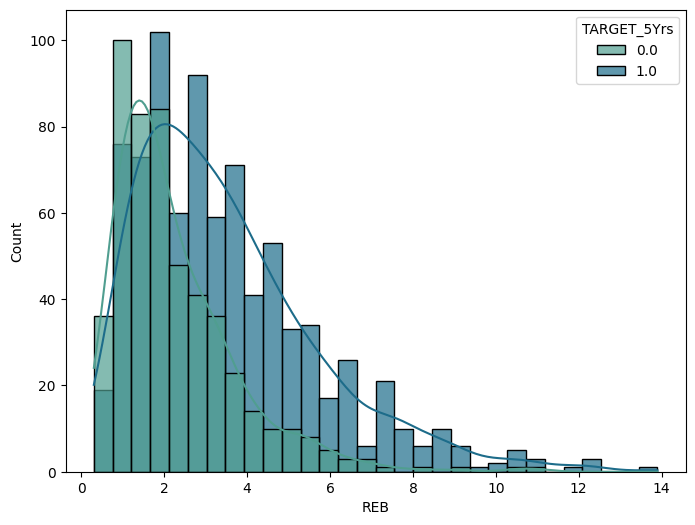

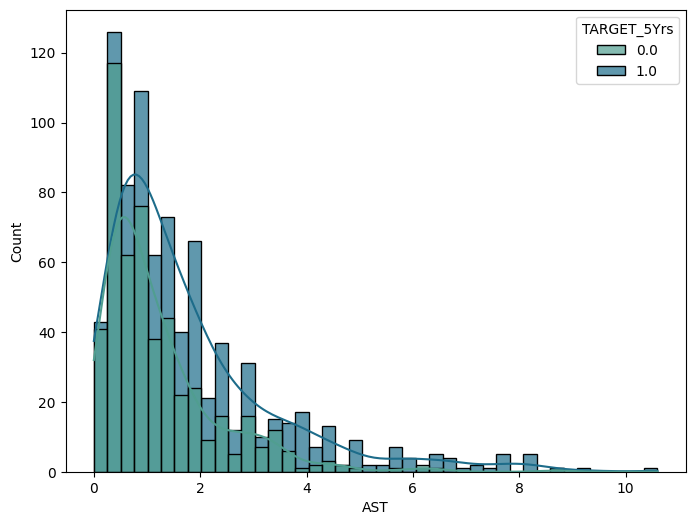

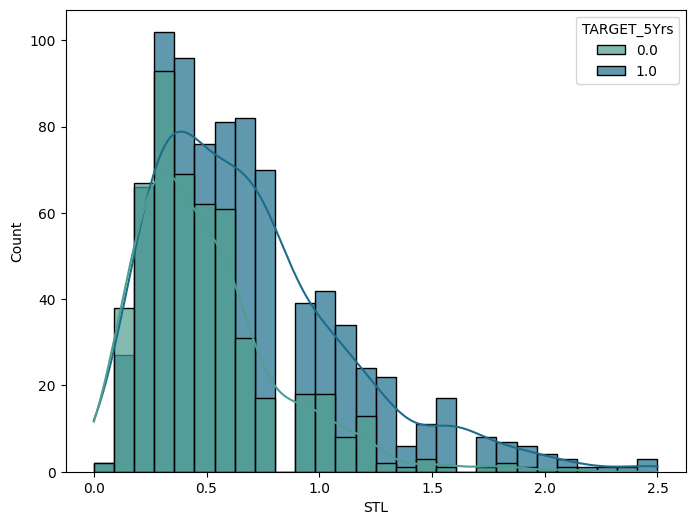

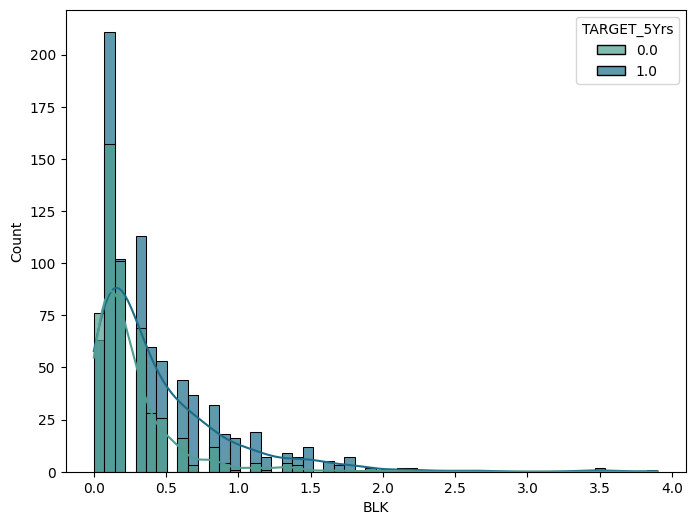

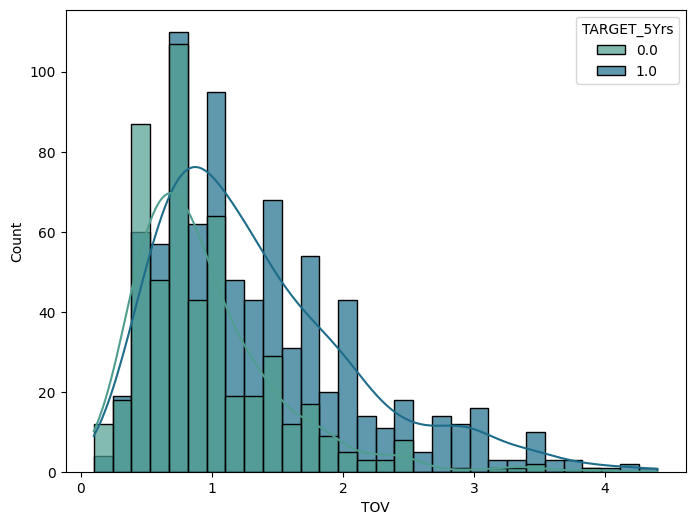

In [60]:
for col in df.select_dtypes('float'):
        if col != 'TARGET_5Yrs':
         plt.figure(figsize=(8, 6))
         sns.histplot(data=df, x=col, hue='TARGET_5Yrs', kde=True, palette="crest", alpha=0.7, common_norm=False)
         plt.show()

<Figure size 640x480 with 0 Axes>

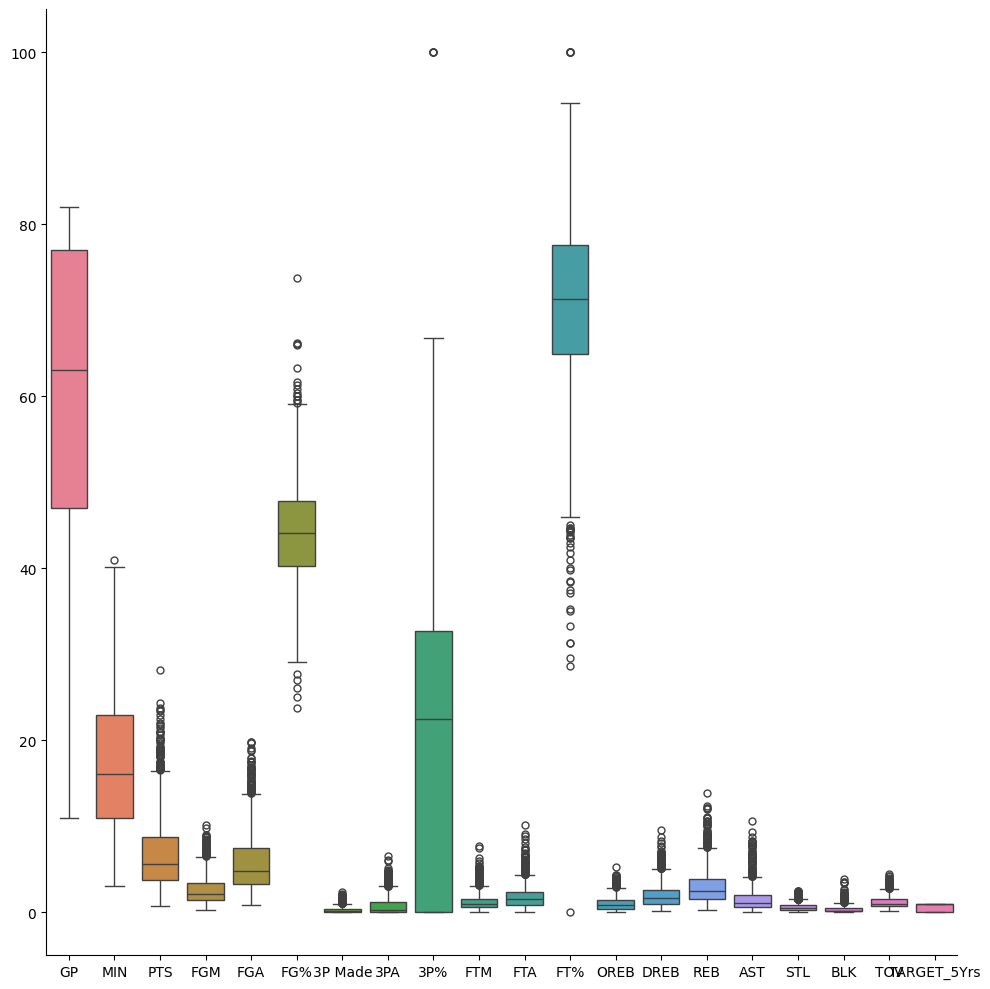

In [40]:
# Group visualization
plt.figure()
sns.catplot(data=df, kind="box",height = 10)
plt.show()

Remove outliers

In [41]:
def remove_outliers_iqr(df, columns, threshold=1.5):
    """ IQR computation to remove outliers """
    df_without_outliers = df.copy()

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - (threshold * IQR)
        upper_bound = Q3 + (threshold * IQR)

        df_without_outliers = df_without_outliers[(df_without_outliers[col] >= lower_bound) & (df_without_outliers[col] <= upper_bound)]

    return df_without_outliers




In [42]:
# Remove target and names before outliers processing
labels  = df.drop(['Name'],axis=1).columns.values
df      = df.drop(['Name'],axis=1)
df      = pd.DataFrame(df)

df_without_outliers = remove_outliers_iqr(df,labels,1.5)
df_without_outliers.reset_index()
print(df_without_outliers.shape)

(948, 20)


Plot data after outliers removal

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

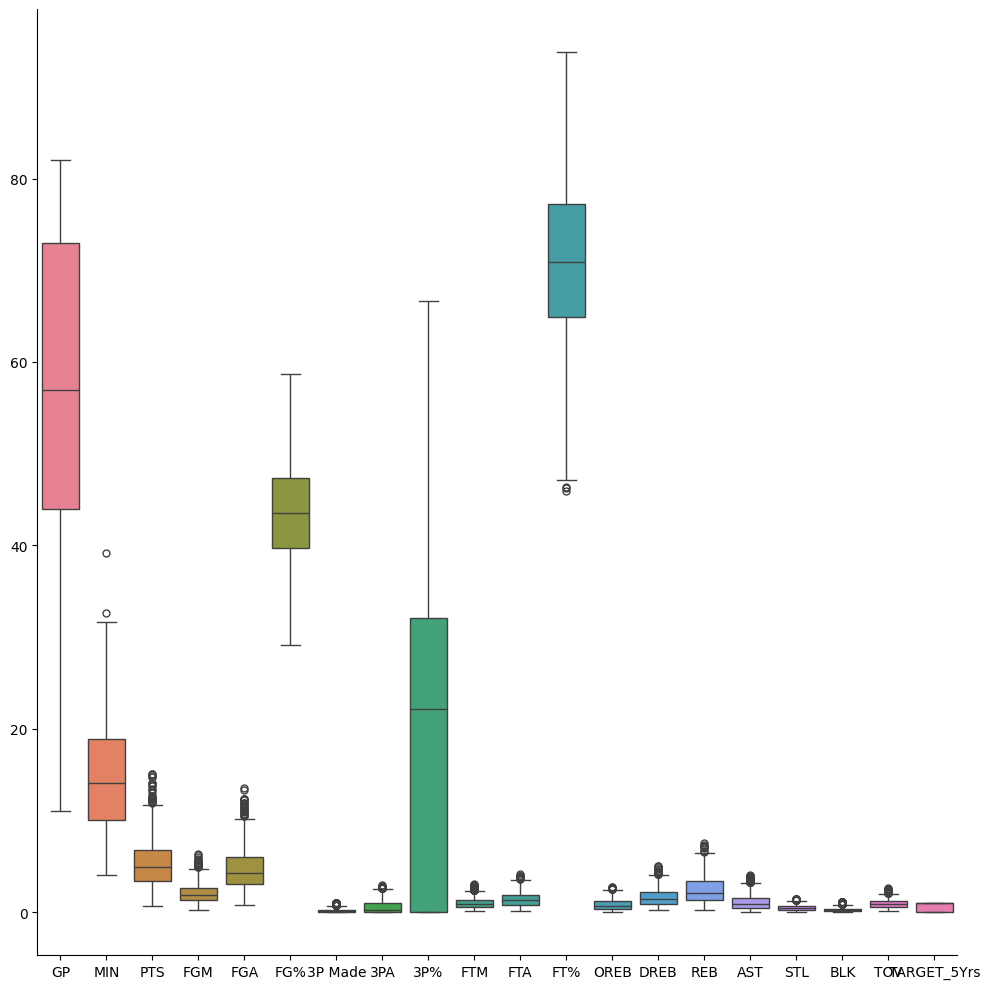

In [43]:
plt.figure()
sns.catplot(data=df_without_outliers, kind="box",height = 10)
plt.show

Save the df_without_outliers dataframe for further preprocessing steps

df_without_outliers will be saved as clean_dataset

Warning : here without outliers means with less outliers !

In [44]:
# final clean dataset
clean_dataset = df_without_outliers 

# save data set with joblib
jb.dump(clean_dataset, "clean_dataset.sav") 


['clean_dataset.sav']

# Modelling

Split train and test set using the clean dataset loaded from folder

In [45]:
# load cleanset to have a nice clean start
loaded_df    = jb.load('clean_dataset.sav')

In [46]:
df = loaded_df.copy()
print(df)

      GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA   3P%  FTM  FTA   FT%  \
0     36  27.4   7.4  2.6   7.6  34.7      0.5  2.1  25.0  1.6  2.3  69.9   
1     35  26.9   7.2  2.0   6.7  29.6      0.7  2.8  23.5  2.6  3.4  76.5   
2     74  15.3   5.2  2.0   4.7  42.2      0.4  1.7  24.4  0.9  1.3  67.0   
3     58  11.6   5.7  2.3   5.5  42.6      0.1  0.5  22.6  0.9  1.3  68.9   
4     48  11.5   4.5  1.6   3.0  52.4      0.0  0.1   0.0  1.3  1.9  67.4   
5     75  11.4   3.7  1.5   3.5  42.3      0.3  1.1  32.5  0.4  0.5  73.2   
6     62  10.9   6.6  2.5   5.8  43.5      0.0  0.1  50.0  1.5  1.8  81.1   
7     48  10.3   5.7  2.3   5.4  41.5      0.4  1.5  30.0  0.7  0.8  87.5   
8     65   9.9   2.4  1.0   2.4  39.2      0.1  0.5  23.3  0.4  0.5  71.4   
9     42   8.5   3.7  1.4   3.5  38.3      0.1  0.3  21.4  1.0  1.4  67.8   
10    35   6.9   2.3  0.9   2.4  36.5      0.0  0.1  33.3  0.5  0.6  81.8   
11    40   6.7   3.6  1.2   3.0  39.8      0.1  0.6  13.6  1.1  1.5  77.6   

In [47]:
def prepare_data_for_modelisation(df):

    target  = df['TARGET_5Yrs'].to_numpy()
    labels  = df.drop(['TARGET_5Yrs'],axis=1).columns.values
    df      = df.drop(['TARGET_5Yrs'],axis=1)
    data    = df.to_numpy()

    return  data,target

In [48]:
# For score_classifier function
data, target  = prepare_data_for_modelisation(df)

# MODEL PREDICTION 
## Aim : find the best recall score 

Recall scare => lowest False negative  (on a confusion matrix) 

Define classifiers

In [49]:
SVM             = make_pipeline(MinMaxScaler(),SVC(random_state=0))
KNN             = make_pipeline(MinMaxScaler(),KNeighborsClassifier(5))
Randomforest    = make_pipeline(RandomForestClassifier(random_state=0)) # Normalization not necessarily need it for trees
Adaboost        = make_pipeline(AdaBoostClassifier(algorithm="SAMME",random_state=0))# avoid warning
GNB             = make_pipeline(MinMaxScaler(),GaussianNB())


dict_of_models  = {"SVM" : SVM,
                  "KNN" : KNN,
                  "Randomforest" : Randomforest,
                  "Adaboost" : Adaboost,
                  'GNB':GNB}


Test score_classifier on the entire clean_dataset

In [50]:
def score_classifier(dataset,classifier,labels):

    kf = KFold(n_splits=3,random_state=50,shuffle=True) # bootstraping
    confusion_mat = np.zeros((2,2))
    recall = 0
    for training_ids,test_ids in kf.split(dataset):
        training_set = dataset[training_ids]
        training_labels = labels[training_ids]
        test_set = dataset[test_ids]
        test_labels = labels[test_ids]
        classifier.fit(training_set,training_labels)
        predicted_labels = classifier.predict(test_set)
        confusion_mat+=confusion_matrix(test_labels,predicted_labels)
        recall += recall_score(test_labels, predicted_labels)
    recall/=3
    print('mean recall out of 3 Kflod splits : ' , recall)

   

In [51]:
# Loop over score_classifier
for clf_name, clf in dict_of_models.items():
   
    print('-----' , clf_name ,'-----')
    score_classifier(data, clf, target)

----- SVM -----
mean recall out of 3 Kflod splits :  0.7137111648962137
----- KNN -----
mean recall out of 3 Kflod splits :  0.7018960685932528
----- Randomforest -----
mean recall out of 3 Kflod splits :  0.6802907820989509
----- Adaboost -----
mean recall out of 3 Kflod splits :  0.6692963557558764
----- GNB -----
mean recall out of 3 Kflod splits :  0.5353882779776354


Based on score_classifier function => choose best algorithm that maximizes recall score

Split data

In [52]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=42)

Prepare for future modelisation

In [53]:
X_train, Y_train    = prepare_data_for_modelisation(trainset)
X_test, Y_test      = prepare_data_for_modelisation(testset)
print(X_train.shape)
print(X_test.shape)

(758, 19)
(190, 19)


Normalize X_train and X_test data

In [54]:
scaler          = MinMaxScaler() # to save it later
X_train         = scaler.fit_transform(X_train)
X_test          = scaler.transform(X_test) 

Model optimization / Hyperparameters fine tuning / features selection

In [55]:
model_selected      = SVC()
model_selected.fit(X_train, Y_train)
Y_pred              = model_selected.predict(X_test)
recall              = recall_score(Y_test, Y_pred)
print(recall)

0.7474747474747475


Hyperparameters fine tuning

In [56]:
model_to_optimize = make_pipeline(SVC()) 
hyper_parameters = {'svc__gamma':['auto'],
                    'svc__C' : [0.1,1,10,20,100] , 
                    'svc__kernel':['rbf','linear','sigmoid','poly'],
                    'svc__degree':[2,3,4]} 

grid_search = GridSearchCV(model_to_optimize, hyper_parameters,scoring='recall',cv=3)
grid_search.fit(X_train,Y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

Best Hyperparameters: {'svc__C': 0.1, 'svc__degree': 2, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'}
Best Score: 1.0


Model optimized based upon Hyperparameters

In [57]:
model_optimized      = grid_search.best_estimator_
model_optimized.fit(X_train, Y_train)
Y_pred              = model_optimized.predict(X_test)
recall              = recall_score(Y_test, Y_pred)
print(recall)

1.0


Overfitting ?? I don't think so. Let's see now if we can reduce our dataset 

# Based upon the recall score, do we need all features ?

Use : SelectKBest for Features selection

In [58]:
features        =  df.drop(["TARGET_5Yrs"],axis=1)
bestfeatures    = SelectKBest(score_func=f_classif) # choose from figure
data_trim       = bestfeatures.fit(X_train, Y_train)
filter          = bestfeatures.get_support()


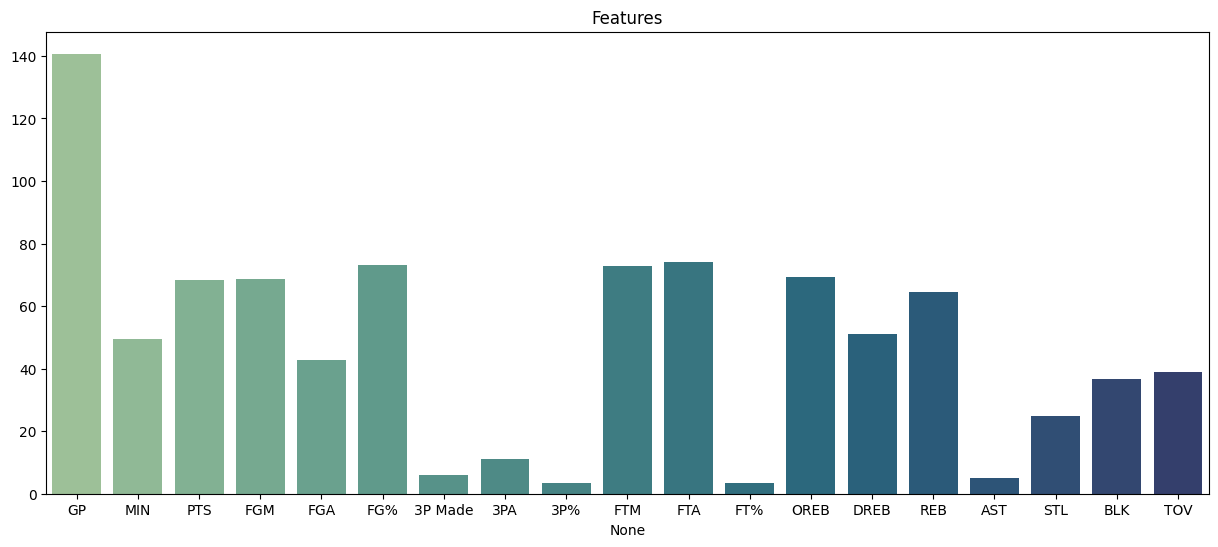

In [59]:
plt.figure(figsize=(15, 6))
sns.barplot(x=features.columns,y=bestfeatures.scores_,hue=features.columns,palette="crest",legend=False)
plt.title("Features")
plt.show()


# Select k for the SelectKBest function of scikit learn

Reduce data and test model again

In [60]:
for i in range(19):
    # features selection
    bestfeatures        = SelectKBest(score_func=f_classif,k=i+1) # choose from figure
    data_trim           = bestfeatures.fit_transform(X_train, Y_train)
    filter              = bestfeatures.get_support()
    selected_features   = features.columns[filter]

    # Data reduction
    reduce_dataset = df[selected_features]
    reduce_dataset["TARGET_5Yrs"] = df["TARGET_5Yrs"]

    trainset_reduce_data, testset_reduce_data = train_test_split(reduce_dataset, test_size=0.2, random_state=0)
    # rd for reduced_daraset
    X_train_rd, Y_train_rd    = prepare_data_for_modelisation(trainset_reduce_data)
    X_test_rd, Y_test_rd      = prepare_data_for_modelisation(testset_reduce_data)

    # Data normalization
    scaler              = MinMaxScaler() # to save it later
    X_train_rd          = scaler.fit_transform(X_train_rd)
    X_test_rd           = scaler.transform(X_test_rd) 

    # Test model again
    model_optimized.fit(X_train_rd, Y_train_rd)
    Y_pred              = model_optimized.predict(X_test_rd)
    recall              = recall_score(Y_test_rd, Y_pred)

    print(f"{i+1} feature(s) => recall {recall} => {list(selected_features)} ")

    

1 feature(s) => recall 0.7433628318584071 => ['GP'] 
2 feature(s) => recall 0.7522123893805309 => ['GP', 'FTA'] 
3 feature(s) => recall 0.8053097345132744 => ['GP', 'FG%', 'FTA'] 
4 feature(s) => recall 0.831858407079646 => ['GP', 'FG%', 'FTM', 'FTA'] 
5 feature(s) => recall 0.7876106194690266 => ['GP', 'FG%', 'FTM', 'FTA', 'OREB'] 
6 feature(s) => recall 0.7876106194690266 => ['GP', 'FGM', 'FG%', 'FTM', 'FTA', 'OREB'] 
7 feature(s) => recall 0.7964601769911505 => ['GP', 'PTS', 'FGM', 'FG%', 'FTM', 'FTA', 'OREB'] 
8 feature(s) => recall 0.7876106194690266 => ['GP', 'PTS', 'FGM', 'FG%', 'FTM', 'FTA', 'OREB', 'REB'] 
9 feature(s) => recall 0.7964601769911505 => ['GP', 'PTS', 'FGM', 'FG%', 'FTM', 'FTA', 'OREB', 'DREB', 'REB'] 
10 feature(s) => recall 0.8141592920353983 => ['GP', 'MIN', 'PTS', 'FGM', 'FG%', 'FTM', 'FTA', 'OREB', 'DREB', 'REB'] 
11 feature(s) => recall 0.8230088495575221 => ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', 'FTM', 'FTA', 'OREB', 'DREB', 'REB'] 
12 feature(s) => reca

With 4 features only, the recall score is similar to somewhat between 12 or 13 features 

Final model optimisation

In [61]:
nb_features = 4

# features selection
bestfeatures        = SelectKBest(score_func=f_classif,k=nb_features) # choose from figure
data_trim           = bestfeatures.fit_transform(X_train, Y_train)
filter              = bestfeatures.get_support()
selected_features   = features.columns[filter]

# Data reduction
reduce_dataset = df[selected_features]
reduce_dataset["TARGET_5Yrs"] = df["TARGET_5Yrs"]


print(reduce_dataset)

trainset_reduce_data, testset_reduce_data = train_test_split(reduce_dataset, test_size=0.2, random_state=0)
# rd for reduced_daraset
X_train_rd, Y_train_rd    = prepare_data_for_modelisation(trainset_reduce_data)
X_test_rd, Y_test_rd      = prepare_data_for_modelisation(testset_reduce_data)

# Data normalization
scaler              = MinMaxScaler() # to save it later
X_train_rd          = scaler.fit_transform(X_train_rd)
X_test_rd           = scaler.transform(X_test_rd) 

# Test model again
model_optimized.fit(X_train_rd, Y_train_rd)
Y_pred              = model_optimized.predict(X_test_rd)
recall              = recall_score(Y_test_rd, Y_pred)

print(f"{nb_features} features => recall {recall}")

      GP   FG%  FTM  FTA  TARGET_5Yrs
0     36  34.7  1.6  2.3          0.0
1     35  29.6  2.6  3.4          0.0
2     74  42.2  0.9  1.3          0.0
3     58  42.6  0.9  1.3          1.0
4     48  52.4  1.3  1.9          1.0
5     75  42.3  0.4  0.5          0.0
6     62  43.5  1.5  1.8          1.0
7     48  41.5  0.7  0.8          1.0
8     65  39.2  0.4  0.5          0.0
9     42  38.3  1.0  1.4          0.0
10    35  36.5  0.5  0.6          0.0
11    40  39.8  1.1  1.5          1.0
14    44  53.7  0.4  0.7          1.0
15    40  51.4  0.7  1.0          1.0
16    49  37.6  0.7  1.1          0.0
17    41  34.8  0.5  0.6          0.0
20    82  48.9  2.6  3.9          1.0
23    32  53.3  0.8  1.3          0.0
24    76  51.4  2.5  3.1          1.0
26    76  41.5  1.2  1.6          1.0
27    78  44.7  1.6  2.2          0.0
28    51  49.7  2.0  2.9          1.0
31    82  41.9  1.2  1.5          1.0
32    48  52.8  2.0  3.0          1.0
33    34  30.2  0.9  1.0          0.0
34    42  40

# Save final model

In [62]:
# %% save model with joblib 
jb.dump(scaler, "scaler.sav") 
jb.dump(model_optimized,'nba_model_optimzed.sav')

['nba_model_optimzed.sav']

Test some predictions

In [63]:
X           = [[0 ,42.6 , 0.9 , 1.3 ]]
X_scaled    = scaler.transform(X)
Y           = model_optimized.predict(X_scaled)
print(Y)

[0.]


Conclusion : The recall score with a reduced dataset of 4 features (from originally 19) is about 0,83. 

The final criterion decision would have to be discussed in order to understand the acceptable limits.